In [1]:
!pip install sumy
!pip install transformers
!pip install simpleT5
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 94 kB 2.8 MB/s 
     |████████████████████████████████| 10.1 MB 47.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21712 sha256=65e8afcb718153bc7a211cb695b68d5e4a9e66153843c92ff9aabe7954434569
  Stored in directory: /root/.cache/pip/wheels/d4/bf/51/81d27ad638e1a6dca4f362ecc33d1e2c764b8ea7ec751b8fc1
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=abf9a7b0c0509491f03d486f08723014e7c5c9840ec9adc2c4600e5ba840ce5a
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=0460ddf952e5ab74562a8eaf62

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.9 MB 23.8 MB/s 

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 319, in run
    reqs, check_supported_wheels=not options.target_dir
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 128, in resolve
    requirements, max_rounds=try_to_avoid_resolution_too_deep
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 473, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local

In [ ]:
!pip install pycountry


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import regex as re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.corpus.reader.tagged import sent_tokenize
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.nlp.tokenizers import Tokenizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.luhn import LuhnSummarizer as Summarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

import warnings
warnings.filterwarnings('ignore')
from transformers import GPT2Tokenizer,GPT2LMHeadModel
import gensim
from gensim.summarization.summarizer import summarize
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
import tensorflow_text as text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


FileNotFoundError: ignored

In [ ]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

AttributeError: ignored

#Text Summarization

Approach 1: Baseline extractive approach wherein most frequent words are searched for and the sentences containing such words are considered in the summary.

Drawbacks: Dosen't really summarize the text, needs fullstop to be splitted and no care given to the semantics of the text dataset.

In [ ]:
with open('news.txt', 'r', errors = 'ignore') as f:
    news_text = f.read()

In [ ]:
with open('health.txt', 'r', errors = 'ignore') as f:
    health_text = f.read()

health_text = re.sub('\n','. ', health_text)

In [ ]:
def freq_summarizer(contents):
    
    contents = re.sub('\n', ' ', contents)
    contents = re.sub("[\(\[].*?[\)\]]", "", contents)
    contents = re.sub("[()]",'', contents)
    contents = re.sub(" +", ' ', contents)
    contents = contents.lower()

    stop = stopwords.words('english')
    tokens = contents.split(' ')
    cleaned_text = ""
    for word in tokens : 
        if word not in stop : 
            cleaned_text += word + ' '

    doc = nltk.FreqDist(cleaned_text.split(" "))

    most_freq_words = []
    for v in doc.most_common(20)[:10]:
        most_freq_words.append(v[0])
    sents = sent_tokenize(cleaned_text)
    
    print(f'The most frequent words occuring are: {most_freq_words}')
    doc.plot(20, cumulative = False, title = 'FreqDist')
    print(f'Total number of sentences before summarization:{len(sents)}')
    
    filter_sents = []
    for sent in sents:
        c = 0 
        words_in_sent = [i for i in sent.split(' ')]
        for word in most_freq_words : 
            if word in words_in_sent :   
                filter_sents.append(sent)
                break 

    final_doc = ""
    for sent in filter_sents : 
        final_doc += sent + ' '

    sents = sent_tokenize(final_doc)
    print(f'Total number of sentences after summarization: {len(sents)}')
    return final_doc

The most frequent words occuring are: ['building', 'chrysler', 'new', 'york', 'real', 'million', 'purchased', 'estate', 'building,', 'famous']


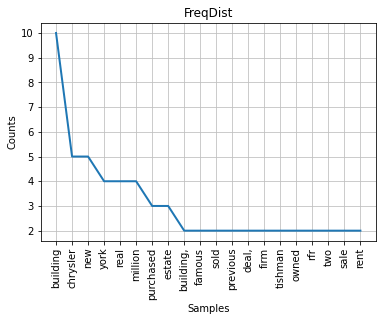

Total number of sentences before summarization:20
Total number of sentences after summarization: 16
chrysler building, famous art deco new york skyscraper, sold small fraction previous sales price. deal, first reported real deal, $150 million, according source familiar deal. mubadala, abu dhabi investment fund, purchased 90% building $800 million 2008. real estate firm tishman speyer owned 10%. buyer rfr holding, new york real estate company. building sold fairly quickly publicly placed market two months ago. incentive sell building huge loss due soaring rent owners pay cooper union, new york college, land building. rent rising $7.75 million last year $32.5 million year $41 million 2028. meantime, rents building rising nearly fast. building iconic landmark new york skyline, competing newer office towers large floor-to-ceiling windows modern amenities. still building among best known city, even people never new york. famous triangle-shaped, vaulted windows worked stylized crown, along d

In [ ]:
news_summary = freq_summarizer(news_text)
print(news_summary)

The most frequent words occuring are: ['care', 'health', 'patient', 'information', 'patients', 'well', 'us', 'chronic', 'healthcare', 'one']


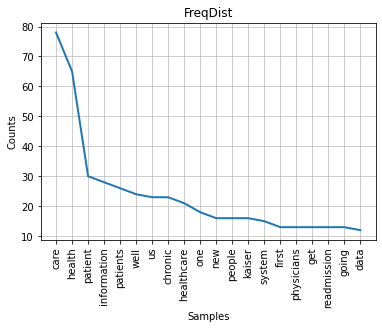

Total number of sentences before summarization:311
Total number of sentences after summarization: 179
dr karen bell chair certification commission health information technology cchit profit hit certification body educational mission. june 2013 post health affairs blog dr bell said models acos must successfully implement seven business processes rely heavily proper use health informatics. seven processes care coordination cohort management patient relationship management clinician engagement financial management reporting knowledge management. first demands ability share health information among various internal external providers patients designated caregivers. second needs data integration clinical administrative financial patient derived sources. third requires attention hit functions support patient safety. health care organizations lot work order achieve this. earlier post dr bell says quote promise accountable care tempered dearth experience care process redesign culture change kn

In [ ]:
health_summary = freq_summarizer(health_text)
print(health_summary)

Approach 2 : TFIDF extractive approach wherein words with the highest tf-idf value are searched for and the sentences containing such words are considered in the summary.

Drawbacks: Needs fullstop to be splitted and no care given to the semantics of the text dataset.

Pros : Compared to Freq_summarizer, this approach pays attention to rarer words in the dataset.

In [ ]:
def tfidf_summarizer(contents):
    contents = re.sub('\n', ' ', contents)
    contents = re.sub("[\(\[].*?[\)\]]", "", contents)
    contents = re.sub("[()]",'', contents)
    contents = re.sub(" +", ' ', contents)
    contents = contents.lower()

    stop = stopwords.words('english')
    tokens = contents.split(' ')
    cleaned_text = ""
    for word in tokens : 
        if word not in stop : 
            cleaned_text += word + ' '

    sents = sent_tokenize(cleaned_text)
    vectorizer = TfidfVectorizer(max_features=20)
    x = vectorizer.fit_transform(sents)
    print(f'Features Names: {vectorizer.get_feature_names_out()}')

    b = x.toarray()
    df = pd.DataFrame(b, columns = vectorizer.get_feature_names_out())

    sent_len = []
    for sent in sents : 
        sent_len.append(len(sent.split(' ')))
    df['length'] = sent_len

    score = []
    for i in range(len(df)) : 
        val = (sum(df.iloc[i]) - df.length.iloc[i])/df.length.iloc[i]
        score.append(val)
    df['score'] = score
    score.sort(reverse = True)

    filt_idx = []
    for sc in score[:10] : 
        for i in range(len(df)) : 
            if df.score.iloc[i] == sc : 
                filt_idx.append(i)
                break 

    filter_text = ""
    c = 0
    for i in range(len(sents)) : 
        if i in filt_idx : 
            c += 1
            filter_text += sents[i] + ' '
    
    print(f'Number of sentences after summarization : {c}')
    
    return filter_text

In [ ]:
news_summary = tfidf_summarizer(news_text)
print(news_summary)

Features Names: ['building' 'chrysler' 'company' 'deal' 'estate' 'famous' 'firm'
 'manhattan' 'million' 'new' 'purchased' 'real' 'rent' 'rfr' 'skyscraper'
 'sold' 'spire' 'still' 'top' 'york']
Number of sentences after summarization : 10
chrysler building, famous art deco new york skyscraper, sold small fraction previous sales price. deal, first reported real deal, $150 million, according source familiar deal. mubadala, abu dhabi investment fund, purchased 90% building $800 million 2008. real estate firm tishman speyer owned 10%. buyer rfr holding, new york real estate company. officials tishman rfr immediately respond request comments. unclear deal close. building sold fairly quickly publicly placed market two months ago. still building among best known city, even people never new york. previous sale took place 2008 financial meltdown led plunge real estate prices. competitor could rise higher, spire chrysler building raised view, giving title. 


In [ ]:
health_summary = tfidf_summarizer(health_text)
print(health_summary)

Features Names: ['care' 'chronic' 'data' 'first' 'going' 'health' 'healthcare'
 'information' 'kaiser' 'new' 'one' 'patient' 'patients' 'people'
 'physicians' 'readmission' 'system' 'us' 'well' 'years']
Number of sentences after summarization : 5
one patient ready discharged. first failures care delivery. well look oldest. 50 years. lesson going talk us healthcare system. 


Approach 3: Using LSA extratctive approach (Latent Semantic Analysis)


In [ ]:

parser = PlaintextParser.from_string( news_text, Tokenizer('english'))

AttributeError: ignored

In [ ]:
lsa_summarizer = LsaSummarizer()
lsa_summary = lsa_summarizer(parser.document,6)

for sentence in lsa_summary:
    print(sentence)

NameError: ignored

Note: These three approaches wouldn't work for the text dataset since we're fundamentally breaking down the text into sentence based chunks depending on fullstops. Absence of '.' prevents us from using such approaches.

In [ ]:
#Instantiating the model and tokenizer with gpt-2
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Encoding text to get input ids & pass them to model.generate()
inputs = tokenizer.batch_encode_plus([news_text],return_tensors = 'pt',max_length = 200, truncation = True)
summary_ids = model.generate(inputs['input_ids'],early_stopping = True)

news_summary = tokenizer.decode(summary_ids[0],skip_special_tokens = True)

NameError: ignored

In [ ]:
print(len(news_summary), len(news_text))
print(news_summary)

872 2753
The Chrysler Building, the famous art deco New York skyscraper, will be sold for a small fraction of its previous sales price.
The deal, first reported by The Real Deal, was for $150 million, according to a source familiar with the deal.
Mubadala, an Abu Dhabi investment fund, purchased 90% of the building for $800 million in 2008.
Real estate firm Tishman Speyer had owned the other 10%.
The buyer is RFR Holding, a New York real estate company.
Officials with Tishman and RFR did not immediately respond to a request for comments.
It's unclear when the deal will close.
The building sold fairly quickly after being publicly placed on the market only two months ago.
The sale was handled by CBRE Group.
The incentive to sell the building at such a huge loss was due to the soaring rent the owners pay to Cooper Union, a New York college, for the land under the building


In [ ]:
inputs = tokenizer.batch_encode_plus([health_text],return_tensors='pt',max_length = 1024, truncation = True)
summary_ids = model.generate(inputs['input_ids'],early_stopping=True)

health_summary = tokenizer.decode(summary_ids[0],skip_special_tokens=True)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 1024, but ``max_length`` is set to 20. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


In [ ]:
print(len(health_summary), len(health_text))
print(health_summary)

5562 35611
dr karen bell is the chair of the certification commission for health information technology cchit which is a not for profit hit certification body with an educational mission. in a june 2013 post on the health affairs blog dr bell said that models such as a acos must successfully implement seven business processes all of which rely heavily on the proper use of health informatics. the seven processes are care coordination cohort management patient relationship management clinician engagement financial management reporting and knowledge management. to support this she lists four primary requirements of an aco hit infrastructure. the first demands the ability to share health information between and among various internal and external providers patients and their designated caregivers. second there needs to be data integration from clinical administrative financial and patient derived sources. the third requires attention to hit functions that support patient safety. the fourth

In [ ]:
gen_summary=summarize(news_text)
print(gen_summary)

The Chrysler Building, the famous art deco New York skyscraper, will be sold for a small fraction of its previous sales price.
The buyer is RFR Holding, a New York real estate company.
Still the building is among the best known in the city, even to people who have never been to New York.
Walter Chrysler had set out to build the tallest building in the world, a competition at that time with another Manhattan skyscraper under construction at 40 Wall Street at the south end of Manhattan.


T5

In [ ]:
#!pip install simplet5
from simplet5 import SimpleT5
model = SimpleT5() 
model.load_model("t5","snrspeaks/t5-one-line-summary")
model.predict(news_text)
print('='*100)
model.predict(health_text)

INFO:pytorch_lightning.utilities.seed:Global seed set to 42


Downloading:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/850M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (618 > 512). Running this sequence through the model will result in indexing errors


KeyboardInterrupt: ignored